## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data OverView

In [2]:
df=pd.read_csv('Bank Churn Modelling.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [9]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [10]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [11]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

## Data Cleaning

In [12]:
df.nunique()

CustomerId          10000
Surname              2932
CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Num Of Products         4
Has Credit Card         2
Is Active Member        2
Estimated Salary     9999
Churn                   2
dtype: int64

In [13]:
df.isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [15]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [17]:
df.duplicated("CustomerId").sum()

0

## Data Visualisation

In [18]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


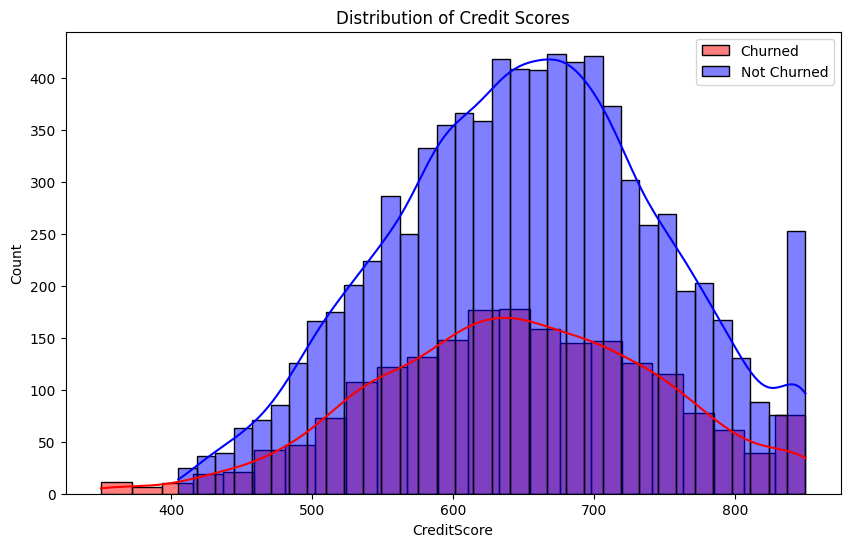

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == 1]['CreditScore'], color='red', kde=True, label='Churned')
sns.histplot(df[df['Churn'] == 0]['CreditScore'], color='blue', kde=True, label='Not Churned')
plt.title('Distribution of Credit Scores')
plt.legend()
plt.show()

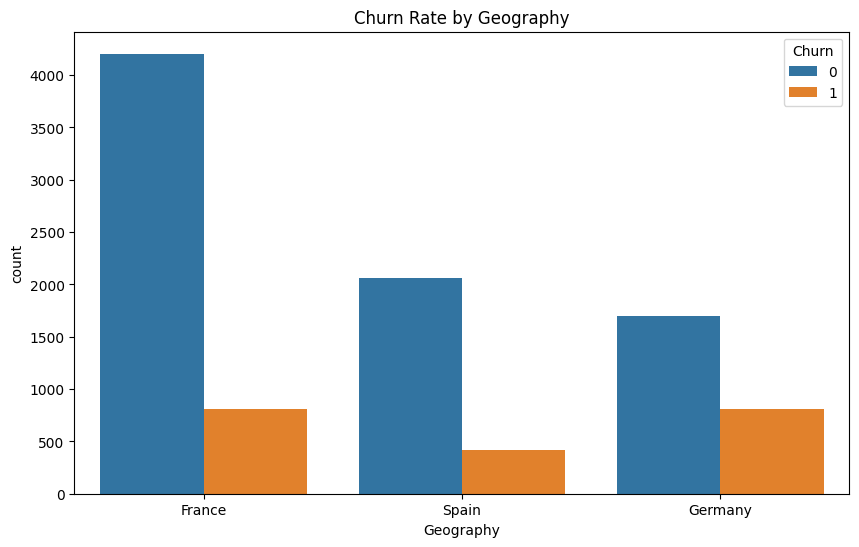

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Churn', data=df)
plt.title('Churn Rate by Geography')
plt.show()


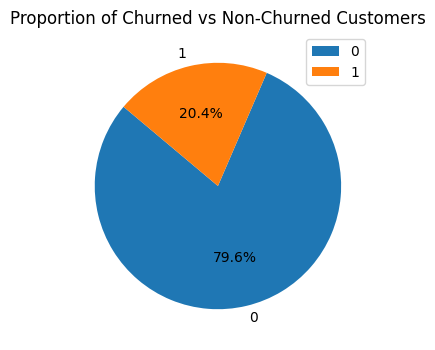

In [21]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Churned vs Non-Churned Customers')
plt.legend()
plt.show()

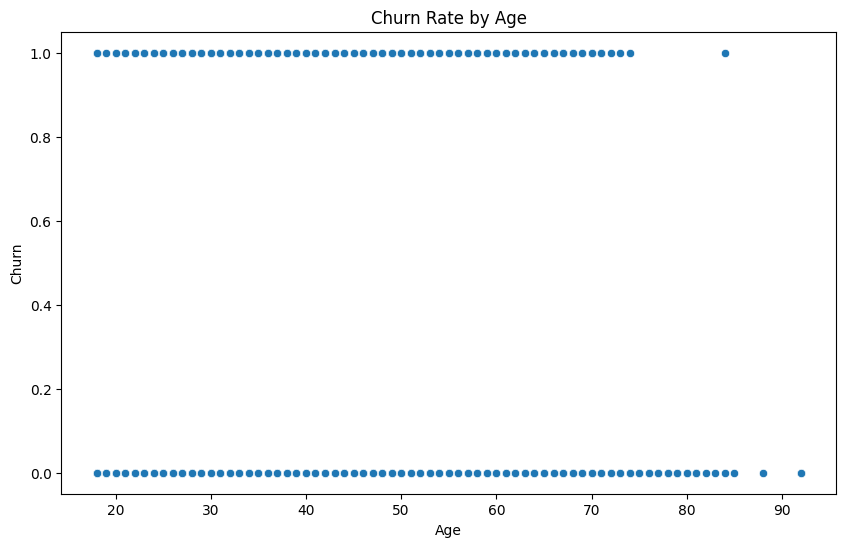

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Churn', data=df)
plt.title('Churn Rate by Age')
plt.show()

In [23]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


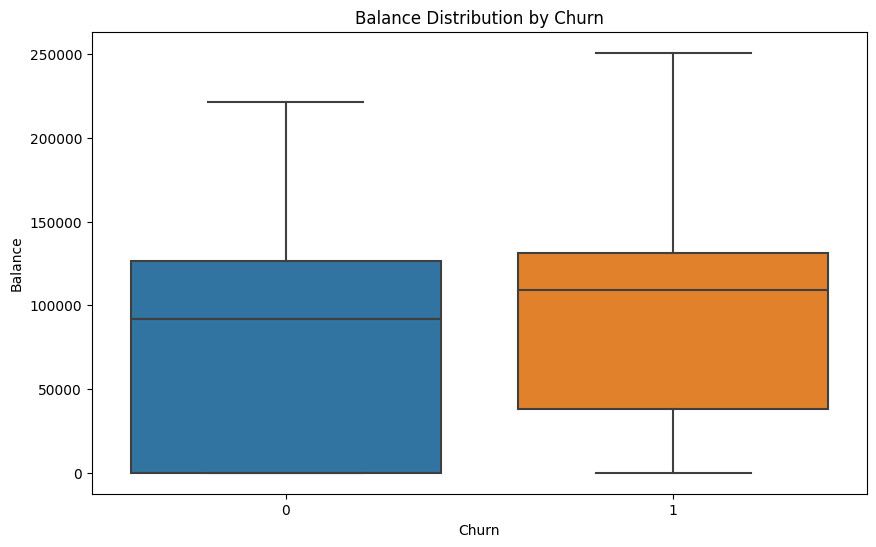

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Balance', data=df)
plt.title('Balance Distribution by Churn')
plt.show()

In [25]:
df.groupby('Churn')['Estimated Salary'].mean().reset_index()

,Churn,Estimated Salary
0,0,99738.391772
1,1,101465.677531


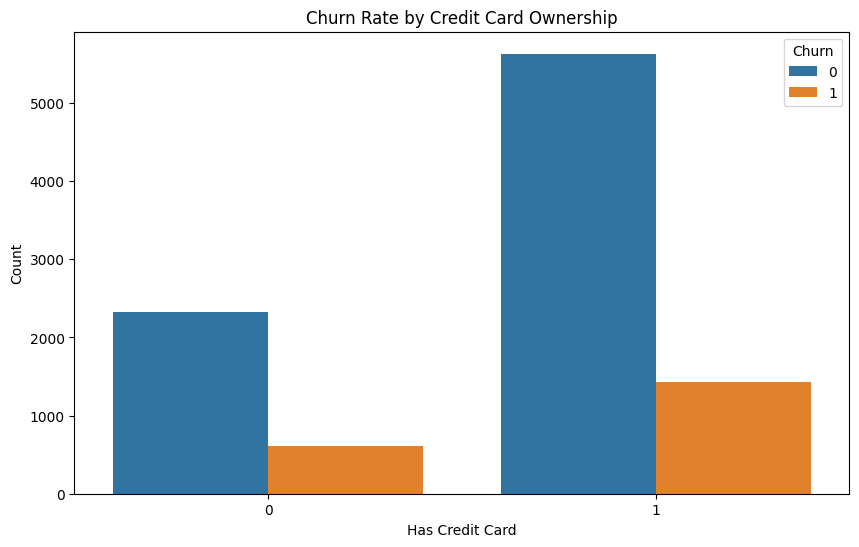

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Has Credit Card', hue='Churn', data=df)
plt.title('Churn Rate by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

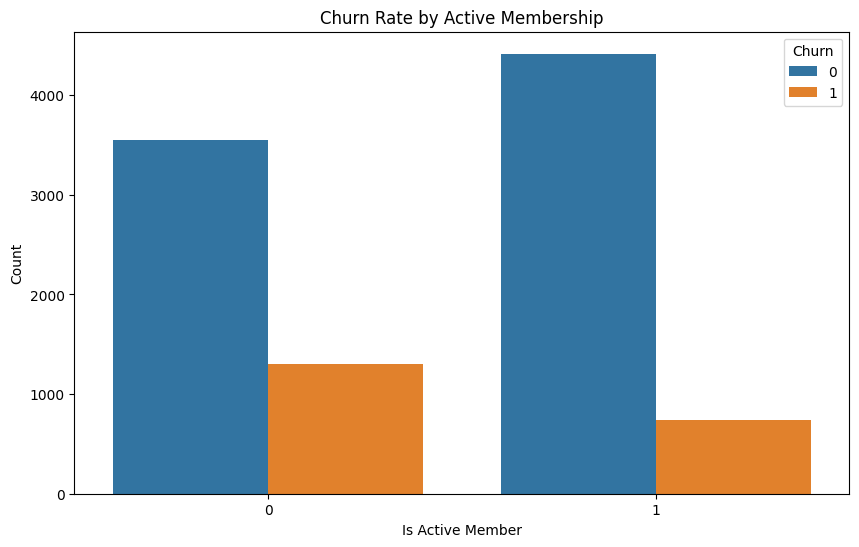

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Is Active Member', hue='Churn', data=df)
plt.title('Churn Rate by Active Membership')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

## Data Encoding

In [28]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [29]:
df['Geography']=df['Geography'].replace({'France':2,'Germany':1,'Spain':0})
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,2,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,2,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,2,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,2,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,2,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,2,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [30]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [31]:
df['Num Of Products']=df['Num Of Products'].replace({1:0,2:1,3:1,4:1})

In [32]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,2,0,42,2,0.00,0,1,1,101348.88,1
1,15647311,Hill,608,0,0,41,1,83807.86,0,0,1,112542.58,0
2,15619304,Onio,502,2,0,42,8,159660.80,1,1,0,113931.57,1
3,15701354,Boni,699,2,0,39,1,0.00,1,0,0,93826.63,0
4,15737888,Mitchell,850,0,0,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,2,1,39,5,0.00,1,1,0,96270.64,0
9996,15569892,Johnstone,516,2,1,35,10,57369.61,0,1,1,101699.77,0
9997,15584532,Liu,709,2,0,36,7,0.00,0,0,1,42085.58,1
9998,15682355,Sabbatini,772,1,1,42,3,75075.31,1,1,0,92888.52,1


## Feature Engineering

In [33]:
df.loc[df['Balance']==0,'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [34]:
df['Zero Balance']=np.where(df['Balance']>0,0,1)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
0,15634602,Hargrave,619,2,0,42,2,0.00,0,1,1,101348.88,1,1
1,15647311,Hill,608,0,0,41,1,83807.86,0,0,1,112542.58,0,0
2,15619304,Onio,502,2,0,42,8,159660.80,1,1,0,113931.57,1,0
3,15701354,Boni,699,2,0,39,1,0.00,1,0,0,93826.63,0,1
4,15737888,Mitchell,850,0,0,43,2,125510.82,0,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,2,1,39,5,0.00,1,1,0,96270.64,0,1
9996,15569892,Johnstone,516,2,1,35,10,57369.61,0,1,1,101699.77,0,0
9997,15584532,Liu,709,2,0,36,7,0.00,0,0,1,42085.58,1,1
9998,15682355,Sabbatini,772,1,1,42,3,75075.31,1,1,0,92888.52,1,0


## Handling Imbalance Data

Class Imbalance is a common problem in machine learning, especially in classification problems as machine learning algorithms are desinged to maximize accuracy and reduce errors. If the data set is imbalance then in such cases, just by predicting the majority class we get a pretty high accuracy, but fails to capture the minority class, which is most often the point of creating the model in the first place, like in

**1. Fraud detection**                                                    
**2. Spam filtering**                                                           
**3. Disease screening**                                                  
**4. Online sales churn**                                                 
**5. Advertising click-throughs**

**Undersampling** can be defined as removing some observations of the majority class. This is done  until the majority and minority class is balanced out.                                                             
Undersampling can be a good choice when you have a ton of data -think millions of rows. But a  drawback to undersampling is that we are removing information that may be valuable. In under-sampling, the simplest technique involves removing random records from the majority  class, which can cause loss of information.                            
A drawback to consider when undersampling is that it can cause overfitting and poor  generalization to your test set.                  

**Oversampling** can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don't have a ton of data to work with.  The simplest implementation of over-sampling is to duplicate random records from the minority class which can cause overfitting.

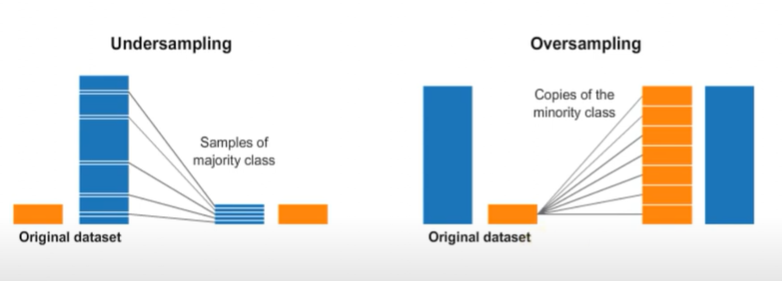

In [39]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

## Random Under Sampling

In [41]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
0,15634602,Hargrave,619,2,0,42,2,0.00,0,1,1,101348.88,1,1
1,15647311,Hill,608,0,0,41,1,83807.86,0,0,1,112542.58,0,0
2,15619304,Onio,502,2,0,42,8,159660.80,1,1,0,113931.57,1,0
3,15701354,Boni,699,2,0,39,1,0.00,1,0,0,93826.63,0,1
4,15737888,Mitchell,850,0,0,43,2,125510.82,0,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,2,1,39,5,0.00,1,1,0,96270.64,0,1
9996,15569892,Johnstone,516,2,1,35,10,57369.61,0,1,1,101699.77,0,0
9997,15584532,Liu,709,2,0,36,7,0.00,0,0,1,42085.58,1,1
9998,15682355,Sabbatini,772,1,1,42,3,75075.31,1,1,0,92888.52,1,0


In [44]:
churn_0=df[df['Churn']==0]
churn_0

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
1,15647311,Hill,608,0,0,41,1,83807.86,0,0,1,112542.58,0,0
3,15701354,Boni,699,2,0,39,1,0.00,1,0,0,93826.63,0,1
4,15737888,Mitchell,850,0,0,43,2,125510.82,0,1,1,79084.10,0,0
6,15592531,Bartlett,822,2,1,50,7,0.00,1,1,1,10062.80,0,1
8,15792365,He,501,2,1,44,4,142051.07,1,0,1,74940.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15569266,Rahman,644,2,1,28,7,155060.41,0,1,0,29179.52,0,0
9994,15719294,Wood,800,2,0,29,2,0.00,1,0,0,167773.55,0,1
9995,15606229,Obijiaku,771,2,1,39,5,0.00,1,1,0,96270.64,0,1
9996,15569892,Johnstone,516,2,1,35,10,57369.61,0,1,1,101699.77,0,0


In [45]:
churn_0=churn_0.sample(n=2037)
churn_0

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
1496,15799156,Okwuadigbo,569,0,1,38,8,0.00,1,0,0,79618.79,0,1
3067,15579781,Buccho,806,1,1,31,10,138653.51,0,1,0,190803.37,0,0
8845,15635703,Chu,729,1,0,39,1,131513.26,0,1,1,193715.00,0,0
1521,15591130,Medvedev,507,0,0,29,6,0.00,1,0,1,94780.90,0,1
6423,15600720,Moore,652,0,1,41,8,115144.68,0,1,0,188905.43,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,15569945,Horsley,509,0,1,29,1,0.00,1,1,0,69113.14,0,1
1571,15615012,Fan,594,2,1,23,5,156267.59,0,1,0,160968.44,0,0
2003,15799350,Mao,632,2,1,41,0,106134.46,0,0,1,105570.39,0,0
5883,15574795,Lombardo,495,2,0,38,2,63093.01,0,1,1,47089.72,0,0


In [47]:
churn_1=df[df['Churn']==1]
churn_1

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
0,15634602,Hargrave,619,2,0,42,2,0.00,0,1,1,101348.88,1,1
2,15619304,Onio,502,2,0,42,8,159660.80,1,1,0,113931.57,1,0
5,15574012,Chu,645,0,1,44,8,113755.78,1,1,0,149756.71,1,0
7,15656148,Obinna,376,1,0,29,4,115046.74,1,1,0,119346.88,1,0
16,15737452,Romeo,653,1,1,58,1,132602.88,0,1,0,5097.67,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,1,1,42,3,152039.70,0,1,1,53445.17,1,0
9982,15768163,Griffin,655,1,0,46,7,137145.12,0,1,0,115146.40,1,0
9991,15769959,Ajuluchukwu,597,2,0,53,4,88381.21,0,1,0,69384.71,1,0
9997,15584532,Liu,709,2,0,36,7,0.00,0,0,1,42085.58,1,1


In [48]:
new_dataset=pd.concat([churn_0,churn_1],axis=0)
new_dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
1496,15799156,Okwuadigbo,569,0,1,38,8,0.00,1,0,0,79618.79,0,1
3067,15579781,Buccho,806,1,1,31,10,138653.51,0,1,0,190803.37,0,0
8845,15635703,Chu,729,1,0,39,1,131513.26,0,1,1,193715.00,0,0
1521,15591130,Medvedev,507,0,0,29,6,0.00,1,0,1,94780.90,0,1
6423,15600720,Moore,652,0,1,41,8,115144.68,0,1,0,188905.43,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,1,1,42,3,152039.70,0,1,1,53445.17,1,0
9982,15768163,Griffin,655,1,0,46,7,137145.12,0,1,0,115146.40,1,0
9991,15769959,Ajuluchukwu,597,2,0,53,4,88381.21,0,1,0,69384.71,1,0
9997,15584532,Liu,709,2,0,36,7,0.00,0,0,1,42085.58,1,1


In [49]:
new_dataset['Churn'].value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

## Define Label and Features

In [52]:
X=new_dataset.drop(columns=['CustomerId','Surname','Churn'])
Y=new_dataset['Churn']

In [53]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
1496,569,0,1,38,8,0.00,1,0,0,79618.79,1
3067,806,1,1,31,10,138653.51,0,1,0,190803.37,0
8845,729,1,0,39,1,131513.26,0,1,1,193715.00,0
1521,507,0,0,29,6,0.00,1,0,1,94780.90,1
6423,652,0,1,41,8,115144.68,0,1,0,188905.43,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,1,42,3,152039.70,0,1,1,53445.17,0
9982,655,1,0,46,7,137145.12,0,1,0,115146.40,0
9991,597,2,0,53,4,88381.21,0,1,0,69384.71,0
9997,709,2,0,36,7,0.00,0,0,1,42085.58,1


In [54]:
Y

1496    0
3067    0
8845    0
1521    0
6423    0
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Churn, Length: 4074, dtype: int64

In [55]:
print(X.shape,Y.shape)

(4074, 11) (4074,)


## Train test Split

In [50]:
from sklearn.model_selection import train_test_split

In [56]:
# train and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [57]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3259, 11) (815, 11) (3259,) (815,)


In [58]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
1448,555,1,0,46,4,120392.99,0,1,0,177719.88,0
602,687,2,0,72,9,0.00,0,0,1,69829.40,1
8273,675,2,1,32,1,0.00,1,1,0,85901.09,1
8050,707,2,1,33,2,0.00,1,0,0,130866.95,1
4224,767,0,1,47,2,0.00,0,1,0,48161.18,1
...,...,...,...,...,...,...,...,...,...,...,...
3061,584,1,1,33,3,88311.48,1,1,1,177651.38,0
5574,503,0,0,36,9,0.00,1,1,1,16274.67,1
839,507,2,1,36,4,83543.37,0,0,0,140134.43,0
8471,525,2,1,51,10,0.00,1,1,0,171045.35,1


In [63]:
Y_train

1448    1
602     0
8273    0
8050    0
4224    1
       ..
3061    0
5574    0
839     0
8471    1
8566    1
Name: Churn, Length: 3259, dtype: int64

## Standardize Features

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [64]:
X_train[['CreditScore','Age','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Balance','Estimated Salary']])
X_test[['CreditScore','Age','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Balance','Estimated Salary']])
                                                                             

In [65]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
1448,-0.954867,1,0,0.450018,4,0.658142,0,1,0,1.360104,0
602,0.399704,2,0,2.903175,9,-1.297767,0,0,1,-0.516335,1
8273,0.276561,2,1,-0.870912,1,-1.297767,1,1,0,-0.236815,1
8050,0.604942,2,1,-0.776560,2,-1.297767,1,0,0,0.545234,1
4224,1.220656,0,1,0.544371,2,-1.297767,0,1,0,-0.893191,1
...,...,...,...,...,...,...,...,...,...,...,...
3061,-0.657272,1,1,-0.776560,3,0.136945,1,1,1,1.358913,0
5574,-1.488486,0,0,-0.493503,9,-1.297767,1,1,1,-1.447763,1
839,-1.447438,2,1,-0.493503,4,0.059482,0,0,0,0.706415,0
8471,-1.262724,2,1,0.921779,10,-1.297767,1,1,0,1.244020,1


## Support Vector Machine Classifier

In [66]:
from sklearn.svm import SVC
model_s=SVC()
model_s.fit(X_train,Y_train)
print("Training Score : ",model_s.score(X_train,Y_train))
print("Test Score : ",model_s.score(X_test,Y_test))

Training Score :  0.7355016876342436
Test Score :  0.698159509202454


In [67]:
y_predicted=model_s.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_predicted)
cm

array([[273, 110],
       [136, 296]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       383
           1       0.73      0.69      0.71       432

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815



## Hyper Parameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [72]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [73]:
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [74]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [75]:
grid_predictions=grid.predict(X_test)

In [76]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       383
           1       0.72      0.70      0.71       432

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815

